In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# Имеются данные adult.csv (см. в материалах к занятию).
# Целевой переменной является уровень дохода income (крайний правый столбец).
# Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
# Вам необходимо построить модели логистической регрессии и SVM, которые предсказывает уровень дохода человека.
# Вывести качество полученных моделей на тестовой выборке, используя функцию score у модели.
# Готовый ноутбук выложить на гитхаб и прислать ссылку.

In [3]:
data = pd.read_csv('adult.csv')

# заменяем снаки вопроса на Other
data.loc[data['workclass'] == '?', 'workclass'] = 'Other'
data.loc[data['native-country'] == '?', 'native-country'] = 'Other'

# целевой параметр классифицируем как 0 и 1
data['income'] = pd.Series(data = LabelEncoder().fit(data['income']).transform(data['income']))

# переводим значения столбцов в 0 и 1
data = pd.get_dummies(data, columns = ['workclass', 
                                 'education', 
                                 'marital-status', 
                                 'occupation', 
                                 'relationship', 
                                 'race', 
                                 'gender', 
                                 'native-country'])
data

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# Создаем тренировочные и тестовые выборки
y = data['income']
X = data.loc[:, ~data.columns.isin(['income'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Оценка точности на TRAIN выборке 0.85
Оценка точности на TEST выборке 0.86

Confusion matrix показывает, что количество истинно отрицательных - максимальное, 
что указывает о высокой точности предсказаний.


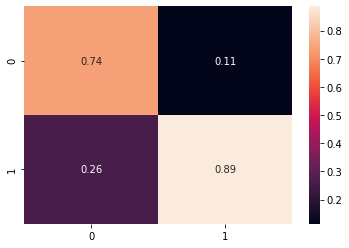

In [5]:
# Строим логистическую регрессию
pipe_model_lg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)
print(f'Оценка точности на TRAIN выборке {round(pipe_model_lg.score(X_train, y_train), 2)}')
print(f'Оценка точности на TEST выборке {round(pipe_model_lg.score(X_test, y_test), 2)}\n')
print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний.")
sn.heatmap(confusion_matrix(y_test, 
                 pipe_model_lg.predict(X_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)

Оценка точности на TRAIN выборке 0.86
Оценка точности на TEST выборке 0.86

Confusion matrix показывает, что количество истинно отрицательных - максимальное, 
что указывает о высокой точности предсказаний.


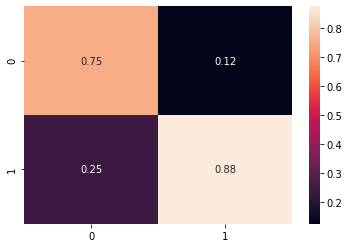

In [6]:
# Строим модель по методу опорных векторов
pipe_model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
print(f'Оценка точности на TRAIN выборке {round(pipe_model_svm.score(X_train, y_train), 2)}')
print(f'Оценка точности на TEST выборке {round(pipe_model_svm.score(X_test, y_test), 2)}\n')
print("Confusion matrix показывает, что количество истинно отрицательных - максимальное, \n\
что указывает о высокой точности предсказаний.")
sn.heatmap(confusion_matrix(y_test, 
                 pipe_model_svm.predict(X_test), 
                 labels=[1, 0],
                 normalize='pred'), annot=True)